Libraries

In [5]:
import torch      
from torch import nn
from torch import optim
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms

Dataset and data loader

In [6]:
transform = transforms.Compose(         
    [transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))])

In [7]:
trainset=torchvision.datasets.MNIST(root='./data',download=True,transform=transform)
testset=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)

In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True,)

In [9]:
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False,)

CNN model 

In [94]:
class net(nn.Module):
  def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)
      

  def forward(self, xb):
        
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

network=net()

loss and optimizer

In [89]:
loss_func = F.cross_entropy
opt=optim.Adam(network.parameters())

creating additional fuction to track loss 

In [90]:
trainingloss=[]
validationloss=[]

In [91]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)
    

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [92]:
import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        #for xb, yb in train_dl:
        losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb,opt) for xb, yb in train_dl]
            )
        train_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        trainingloss.append(train_loss)
        #print(epoch, train_loss)
        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        validationloss.append(val_loss)

        print('Epoch :{}, training_loss :{}, validation_loss :{}'.format(epoch, train_loss,val_loss))

fitting the model for 5 epochs

In [95]:
fit(5,network,loss_func,opt,trainloader,testloader)

Epoch :0, training_loss :0.638464394346873, validation_loss :0.49165101990699767
Epoch :1, training_loss :0.4347897919654846, validation_loss :0.36649537646770475
Epoch :2, training_loss :0.358929198773702, validation_loss :0.3056700393795967
Epoch :3, training_loss :0.3149868702729543, validation_loss :0.30237823964357374
Epoch :4, training_loss :0.28504337629477183, validation_loss :0.26244508274793626


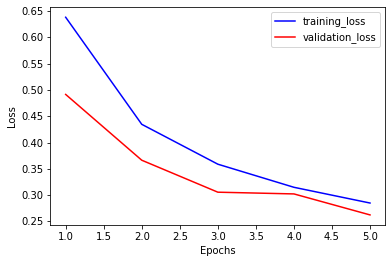

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(1,6,1),trainingloss,'b',label='training_loss')
plt.plot(range(1,6,1),validationloss,'r',label='validation_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [80]:
# to get prediction result
predictions = np.argmax(network(xb).detach().numpy(),axis=1)